## **Fundamentals of Robot Control:**
### **Lecture 1: Robotic System, Models, Dynamical Systems and State Space**

During our course we will discuss **control methods over robots**, our task can be summarized as follows: to **design a control algorithms** that will cause the **controlled object to perform the desired behavior** even in the **presence of possible disturbances**.  However before we move further let us briefly discuss the overall structure of **robotic control system**



But before we will dig in to details let us recall what is the main components of control system are:

<p align="center">
<img src="images/schemes/forc_robot_scheme.png" alt="drawing" width="70%" style="margin:auto"/>
</p>

From the scheme above we may distinguish following:


* **Operator/User** - is providing desired behavior to the control system by means of **desired commands**


* **Plant** - is the device/software we are trying to control and it's consist of:
  * **Actuators** - transform the software signals from controller to dynamical system 
  * **Dynamical system** - take the inputs and change its behavior according to some mechanism of our robot which is completely described by some variables (state)
  * **Sensors** - measure some combination of states and produce the output
  * The Plant can be replaced by **simulator** software that mimic all of the components above.
  


  
* **Controller** - is the software + hardware that take **outputs** from the plant/simulator and produce appropriate **input** based on **user commands**, the controller itself may consist of different blocks, i.e. planner, regulator, observer, estimator etc.

* **Environment** - the system and world is in the constant bilateral interacting process that may be either beneficial or reduce the system performance by inducing **disturbances**

In this course we will mainly focus on **design of controllers**, however to facilitate this we must ensure that we have a clear picture of the object we are going to control.

So today we will try to:
* briefly recall what a dynamical system is
* how to build **mathematical model** 
* **appropriately simulate** behavior of plant

While doing so we will have **two assumptions** (at least for today) namely plant actuators are ideal and supply the **control inputs to plant without any distortions**. The **full state of plant is measurable** without any noise (sensors are ideal as well)

### **Dynamical System**

A dynamical system is a system whose behaviour, indicated by its output
signal, **evolves over time**, possibly under the influence of **external inputs**.

<!-- Interactions of a dynamical system with its environment is usually
expressed with a diagram as shown below:

<p align="center">
<img src="images/schemes/control_system.png" alt="drawing" width="70%" style="margin:auto"/>
</p> -->

<!-- !!! PUT PICTURE HERE: CIRCUITE ROBOT DRON AITPLANE STOCK MARKET !!! -->

Examples of dynamical systems include: 
* Electrical circuits 
* Mechanical systems
* Biological systems
* Stock market, and many others... 

Whatever objects with some quantities changing in time can be viewed as dynamical system

A dynamical system may be
* **SISO or MIMO**: A SISO system is single-input single-output system and a
MISO system is multiple-input multiple-output system
* **Continuous-time or discrete-time**: A continuous-time system accepts and
generates signals at all continuous times continuously.
A discrete system accepts and generates signals at discrete times.
* **Causal or non-causal**: A system is causal if its output at some time $t$
depends on inputs up to time $t$ but not after $t$. Otherwise it is non-causal.
* **Time invariant or time-varying**: A system is time-invariant if its input-output
relationship is independent of time. Otherwise it is time-varying.
* **Linear or nonlinear**: The process that we want to model may be extremely complicated with different non-linearities, it is rare that real life systems are well described by linear models along the whole operational range.

### **Methematical Models**

Mathematical model is the **abstraction** of real world. While one building model of process there are a lot of simplifications may be made, and even seemingly accurate models are never perfectly describe the underlying process. **A model should be as simple as possible, and no simpler**.

<p align="center">
<img src="images/systems/robot_to_model_blank.png"" alt="drawing" width="90%" style="margin:auto"/>
</p>



The fundamental laws of physics, mechanics, electricity, and thermodynamics are usually based on empirical observations that explain variations in physical properties and states of systems. When combined with continuity laws for energy, mass, or momentum, they result in **differential equations**.

### **Differential Equations**
In mathematics, a differential equation is an equation that relates one or more unknown functions and their derivatives. In applications, the functions generally **represent physical quantities**, the derivatives represent their **rates of change**, and the **differential equation defines a relationship between the two**. Such relations are common; therefore, differential equations play a prominent role in many disciplines including engineering, physics, economics, and biology.

Differential equations first came into existence with the invention of calculus by **Newton** and **Leibniz**. In classical mechanics, the motion of a body is described by its position and velocity as the time value varies (**equation of motion**). Newton's laws and variational approaches allow these variables to be expressed dynamically (given the position, velocity, acceleration and various forces acting on the body) as a differential equation for the unknown position of the body as a function of time.


In this class we will use ordinary differential equations (ODE) which describe behavior of system with respect to one variable (usually **time**) in contrast with the term partial differential equation, which may be with respect to more than one independent variable.

Given $\mathbf{F}$, a function of $x, z$, and derivatives of $z$. Then an equation of the form
$$
\mathbf{F}\left(x,z,z',\ldots ,z^{(n-1)}\right)=z^{(n)}
$$

is called an **explicit ordinary differential equation** of order $n$.



More generally, an implicit ordinary differential equation of order $n$ takes the form:
$$
\mathbf{F}\left(x,z,z',\ldots ,z^{(n-1)},z^{(n)}\right)=0
$$

There are further classifications which we will consider a bit later.

<!-- ### **Model** -->

There are variaty of ways how differential equations can be modeled to some way that is beneficial for control design:
* **Impulse response** models (time domain)
* **Transfer function** models (frequency domain)
* **State-space** models (time domain)

At present, mostly state-space models are used due to their generality, simplicity of implementation and mature mathematical apparatus that simplifies their analysis. However, impulse responce and transfer function may be usefull as well. For instance if one is interested in input output relationships, or som terminal properties of a system, impulse
response models or transfer function descriptions can be used.

However in **this course we will stick to the state space models**, since Many of modern systems are complex and may have multiple inputs and multiple outputs.

### **State-space models**

These models are based on the concept of the **state** of the system.

* The **state** $\mathbf{x}$ of a system is the smallest set of variables (called state variables)
such that the knowledge of these variables $\mathbf{x}_0$ at some time $t_0$ together with
the knowledge of the input $\mathbf{u}(\tau)$ for all $\tau$ from $t_0$ to $t$ completely
determines the behavior of the system for any time $t> t_0$ .

A state $\mathbf{x}$ is said to belong to the **state space** the n-dimensional space whose coordinates axes consist of the $\mathbf{x}_i$ 

The state space model is usually represented as the **system of first order differential equations**.


### **Linear Systems**

Linear control theory has been predominantly concerned with the study of control systems, of the form:

$$
\begin{matrix}
    \dot{\mathbf{x}} = \mathbf{A}(t) \mathbf{x} + \mathbf{B}(t) \mathbf{u}\\
    \mathbf{y}=\mathbf{C}(t)\mathbf{x} + \mathbf{D}(t)\mathbf{u}
\end{matrix}
$$

where
*   $\mathbf{x} \in \mathbb{R}^n$ states of the system: describe internal variables that determine the dynamics 
*   $\mathbf{y} \in \mathbb{R}^l$ output vector: describe available measurements in system
*   $\mathbf{u} \in \mathbb{R}^m$ control inputs: the available control inputs 
*   $\mathbf{A} \in \mathbb{R}^{n \times n}$ state matrix: describe mapping between state and it's derivative
*   $\mathbf{B} \in \mathbb{R}^{n \times m}$ input matrix: determine the 'placements' of actuators
*   $\mathbf{C} \in \mathbb{R}^{l \times n}$ output matrix: indicate the where sensors are placed 
*   $\mathbf{D} \in \mathbb{R}^{l \times m}$ feedforward matrix: if somehow we are measuring the control itself (rarely seen)
  
Note that matrices $\mathbf{A},\mathbf{B},\mathbf{C},\mathbf{D}$ are time dependend, we call such systems **time-varient** (LTV). If this matrices are not dependent on time we call such system **time-invariant** (LTI).

LTI systems have quite simple properties, such as:

* a linear system has a **unique equilibrium point** if $\mathbf{A}$ is full rank
* the equilibrium point is **stable** if all eigenvalues of $\mathbf{A}$ have negative real parts, regardless of initial conditions
* the transient response of a linear system is composed of the natural modes of the system, and the general solution can be found **analytically**
* **response** satisfies the principle of superposition.
* a sinusoidal input leads to a sinusoidal output of the **same frequency**.

We will discuss them in details in the upcoming classes.

In robotics most of our systems are actually of second order, while the equations above are given as system of first order. Thus we need to know how to transform from the second order to the first one. Let us do this through following example:

**Example: Mass-Spring-Damper**

<p align="center">
<img src="images/systems/mbk_eq.png" alt="drawing" width="60%" style="margin:auto"/>
</p>

Chosing the state to be $\mathbf{x} = [y,\dot{y}]^T$ one can formulate this system in state space as:
$$
\dot{\mathbf{x}} = \mathbf{A}\mathbf{x} =
\begin{bmatrix}
\dot{y}\\
\ddot{y}
\end{bmatrix}=
\begin{bmatrix}
0 & 1\\
-\frac{k}{m} & -\frac{b}{m}
\end{bmatrix}
 \begin{bmatrix}
y\\
\dot{y}
\end{bmatrix}
$$

### **Nonlinear Systems**

Physical systems are inherently nonlinear. Thus, all control systems are nonlinear to a
certain extent. 
Nonlinear control systems can be described by nonlinear differential equations. 

$$
\begin{matrix}
    \dot{\mathbf{x}} = \mathbf{f}(\mathbf{x},\mathbf{u},\mathbf{d}, t) \\ 
    \mathbf{y}=\mathbf{h}(\mathbf{x},\mathbf{u},\mathbf{d}, t)
\end{matrix}
$$

where $\mathbf{f} \in \mathbb{R}^n$, $\mathbf{h} \in \mathbb{R}^l$ are some nonlinear smooth functions. 

Nonlinear systems in contrast to linear:
* in general one can't obtain analytical solution 
* a nonlinear system has a **multiple equilibrium points**
* the **stability** of these equilibriums is much harder to analyze 
* **response** does not satisfies the principle of superposition.

The form above is fairly general, however there are known special cases, like control-affine and drift-less systems which we will study a bit later.

<!-- However, if the operating range of a control system is small, and if the
involved nonlinearities are smooth, then the control system may be reasonably
approximated by a linearized system, whose dynamics is described by a set of linear
differential equations. -->

<!-- Nonlinearities can be classified as inherent (natural) and intentional (artificial).
Inherent nonlinearities are those which naturally come with the system's hardware and
motion. Examples of inherent nonlinearities include centripetal forces in rotational
motion, and Coulomb friction between contacting surfaces. Usually, such
nonlinearities have undesirable effects, and control systems have to properly
compensate for them. 
Intentional nonlinearities, on the other hand, are artificially
introduced by the designer. -->


**Example: Nonlinear Pendulum**

<p align="center">
<img src="images/systems/pend_eq.png" alt="drawing" width="60%" style="margin:auto"/>
</p>
 


<!-- Let us consider simple pendulum, with dynamics given by:

$$
(m L^2 + I) \ddot{\theta} + mgL \sin\theta + b \dot{\theta} = u
$$ -->



Given state $\mathbf{x} = [\theta, \dot{\theta}]^T$ we may formulate equation above as:

$$
\dot{\mathbf{x}} = 
\begin{bmatrix}
\dot{\theta} \\
\ddot{\theta} 
\end{bmatrix} =
\begin{bmatrix}
\dot{x}_1 \\
\dot{x}_2 
\end{bmatrix} =
\begin{bmatrix}
x_2 \\
\frac{1}{m L^2 + I}(u - mgL \sin x_1-b x_2)
\end{bmatrix} 
$$

**Example: Variable Mass Lander**

<!-- Dynamics of lunar lander given by  Tsiolkovsky-Meshchersky equation:
$$
 m\ddot{x} + mg = -k\dot{m} = -ku
$$ -->

<p align="center">
<img src="images/systems/lander_eq.png" alt="drawing" width="60%" style="margin:auto"/>
</p>



Noting that $m$ is vary we need to include it to state, thus $\mathbf{x} = [x, \dot{x}, m]^T$ and equation above is equalient to:

$$
\dot{\mathbf{x}}=
\begin{bmatrix}
\dot{x} \\
\dot{v} \\ 
\dot{m} \\
\end{bmatrix}=
\begin{bmatrix}
v \\ 
-g - \frac{k}{m} u\\ 
u \\ 
\end{bmatrix} =
\begin{bmatrix}
\dot{x}_1 \\
\dot{x}_2 \\ 
\dot{x}_3 \\
\end{bmatrix} = 
\begin{bmatrix}
x_2 \\ 
-g - \frac{k}{x_3} u\\ 
u \\ 
\end{bmatrix}
$$


### **Generilized Mechanical System**

Equation of motion for most mechanical systems may be written in following form:

$$
\mathbf{M}(\mathbf{q})\ddot{\mathbf{q}} + \mathbf{h}(\mathbf{q},\dot{\mathbf{q}}) + \mathbf{d}(\mathbf{q},\dot{\mathbf{q}},t) = \mathbf{Q} = \mathbf{B}(\mathbf{q})\mathbf{u}
$$
<!-- \mathbf{M}(\mathbf{q})\ddot{\mathbf{q}}  + \mathbf{C}(\mathbf{q},\dot{\mathbf{q}})\dot{\mathbf{q}} + \mathbf{g}(\mathbf{q}) + \mathbf{d}(\mathbf{q},\dot{\mathbf{q}},t) =  -->

where:
* $\mathbf{Q} \in \mathbb{R}^n$ - generalized forces corresponding to generilized coordinates
* $\mathbf{B} \in \mathbb{R}^{n \times m}$ - input mapping matrix that mapped actual forces to the 
* $\mathbf{d} \in \mathbb{R}^n$ - disturbances (for instance friction or external forces)
* $\mathbf{q} \in \mathbb{R}^{n}$ - vector of generilized coordinates
* $\mathbf{M} \in \mathbb{R}^{n \times n}$ - positive definite symmetric inertia matrix 
* $\mathbf{h} \in \mathbb{R}^n$ nonlinear term that describe the internal forces (coriolis and centrifugal terms)


One can easily transform the mechanical system to the state space form by defining the state $\mathbf{x} = [\mathbf{q}, \dot{\mathbf{q}}]^T$:

$$
\dot{\mathbf{x}}=
\begin{bmatrix}
\dot{\mathbf{x}}_1 \\ 
\dot{\mathbf{x}}_2
\end{bmatrix}=
\begin{bmatrix}
\dot{\mathbf{q}} \\ 
\ddot{\mathbf{q}}
\end{bmatrix}=
\begin{bmatrix}
\mathbf{x}_2 \\
\mathbf{M}^{-1}(\mathbf{x}_1) \big(\mathbf{B}(\mathbf{x}_1)\mathbf{u} - \mathbf{d}(\mathbf{x}_1, \mathbf{x}_2,t) -  \mathbf{h}(\mathbf{x}_1, \mathbf{x}_2) \big)
\end{bmatrix}
$$


**Example: Floating Rigid Body**

The model of floating rigid body described by its postion $\mathbf{p}$, linear $\mathbf{v} = \dot{\mathbf{p}}$ and angular velocity $\boldsymbol{\omega}$ subject to external force $\mathbf{f}$ and torque $\boldsymbol{\tau}$:


<p align="center">
<img src="images/systems/srb_eq.png" alt="drawing" width="60%" style="margin:auto"/>
</p>


To rewrite the following in the general form one may define following:
$$
\mathbf{M}(\mathbf{q}) = 
\begin{bmatrix}
mI & 0 \\
0 & \mathcal{I}\\
\end{bmatrix}, \quad
\mathbf{h}(\mathbf{q},\dot{\mathbf{q}}) = 
\begin{bmatrix}
mg \\
\boldsymbol{\omega} \times  \mathcal{I}\boldsymbol{\omega}\\
\end{bmatrix}, \quad \mathbf{B} = \mathbf{I}
$$

**Example: Artificial Satellite**

The artificial satellite orbiting planet may be described using Newton gravity theory as:
<!-- 
$$
\left\{\begin{matrix}
m\ddot{r}=m r\dot{\theta}^2  -G\cfrac{m M}{r^2} + u_r
\\ 
mr\ddot{\theta}=-2 m \dot{r}\dot{\theta}+ u_\theta
\end{matrix}\right.
$$ -->

<p align="center">
<img src="images/systems/satt_eq.png" alt="drawing" width="60%" style="margin:auto"/>
</p>


Given the generilized coordinates as $\mathbf{q} = [r, \theta]$ and control $\mathbf{u} = [u_r, u_\theta]^T$ one can express above in the general form:

$$
\mathbf{M}(\mathbf{q}) = 
\begin{bmatrix}
m & 0 \\
0 & mr \\
\end{bmatrix}, \quad
\mathbf{h}(\mathbf{q},\dot{\mathbf{q}}) = 
\begin{bmatrix}
-mr\dot{\theta}^2 + G\cfrac{m M}{r^2} \\
2m\dot{r}\dot{\theta}\\
\end{bmatrix}, \quad \mathbf{B} = \mathbf{I}
$$

**Example: Cart Pole**

Let us consider the cart pole described by:
<!-- $$
\begin{cases} 
\left(M+m\right){\ddot {r}}-m L \ddot{\theta} \cos \theta +m L \dot{\theta }^{2}\sin \theta = u \\
mL^2 \ddot{\theta}- mLg\sin \theta =mL\ddot{r} \cos \theta  \\
\end{cases}
$$ -->

<p align="center">
<img src="images/systems/cart_pole_eq.png" alt="drawing" width="60%" style="margin:auto"/>
</p>


Defyning the generilized coordinates as $\mathbf{q} = [r, \theta]$ and matching the terms yields:

$$
\mathbf{M}(\mathbf{q}) = 
\begin{bmatrix}
M + m & -mL \cos \theta \\
-mL \cos \theta & mL^2 \\
\end{bmatrix}, \quad
\mathbf{h}(\mathbf{q},\dot{\mathbf{q}}) = 
\begin{bmatrix}
mL\dot{\theta }^{2}\sin \theta\\
-mLg\sin \theta\\
\end{bmatrix}, \quad 
\mathbf{B} = 
\begin{bmatrix}
0 \\
1 \\
\end{bmatrix}
$$


Note that the choice of a set of state variables for a system is **not unique**. So
a state-space model for a system is also not unique. There can be **infinitely many possibilities**.

When the model is obtained from a known differential equation, you can
always select meaningful state variables. However, state variables may not
directly relate to physical variables if the model is obtained from
**identification methods**.

### **Other Models**
It should be noted that there are special cases when the equations above maybe simplified or some interesting properties may be exploited, examples are:

* Control affine systems: $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}) + \mathbf{G}(\mathbf{x})\mathbf{u}$ 
* Drift-less systems: $\dot{\mathbf{x}} = \mathbf{G}(\mathbf{x})\mathbf{u}$ 
* Differential-Algebraic Equations: $\mathbf{F}(\dot{\mathbf{x}}, \mathbf{x},\mathbf{u}) = \boldsymbol{0}$ 
* Mechanical Systems in Regressor Form: $\mathbf{Y}(\mathbf{q}, \dot{\mathbf{q}},\ddot{\mathbf{q}})\mathbf{p} = \mathbf{B}(\mathbf{q})\mathbf{u}$
* Differential-Inclusions: $\dot{\mathbf{x}} \in \mathbf{f}(\mathbf{x},\mathbf{u},\mathbf{d}, t)$

We will consider some of these later on.

### **Simulation of ODE**
While studying ODE $\dot{\mathbf{x}} = \boldsymbol{f}(\mathbf{x}, \mathbf{u}, t)$, one is often interested in its solution $\mathbf{x}(t)$ (integral curve):
$$
\mathbf{x}(t) = \int_{t_0}^{t} \boldsymbol{f}(\tau,\mathbf{x}(\tau),\mathbf{u}(\tau))d\tau,\quad \text{s.t: } \mathbf{x}(t_0) = \mathbf{x}_0
$$
The simulation is nothing but tacking the integral above.

However, in most practical situations the above cannot be solved analytically and one should consider numerical integration instead, thus ending up with descrete system:

$$
\mathbf{x}_{k+1} = \mathbf{f}_d(\mathbf{x}_k,\mathbf{u}_k,\mathbf{d}_k, k),\quad \text{s.t: } \mathbf{x}_0 = \mathbf{x}(t_0)
$$

Thus simulation is just **iteration over the descrete dynamics** starting from initial point $\mathbf{x}_0 = \mathbf{x}(t_0)$

Let us implement the simulation of nonlinear pendulum via iterating the discrete dynamics:

In [1]:
import numpy as np 

def f(state, t, control):
    u = control 
    x1, x2 = state 
    dx1 = x2 
    dx2 = u - np.sin(x1) - 0*x2
    return np.array([dx1, dx2])


In [2]:
x_0 = np.array([1,0])
T = 1E-2
tf = 10
N = int(tf/T)
X = []


# ITERATE DESCRETE DYNAMICS
x_prev = x_0
for k in range(N):
    X.append(x_prev)
    u_k = 0
    x_new = x_prev + T*f(x_prev, k*T, u_k)
    x_prev = x_new 

x_sol_simp = np.array(X)

Let us plot the result:

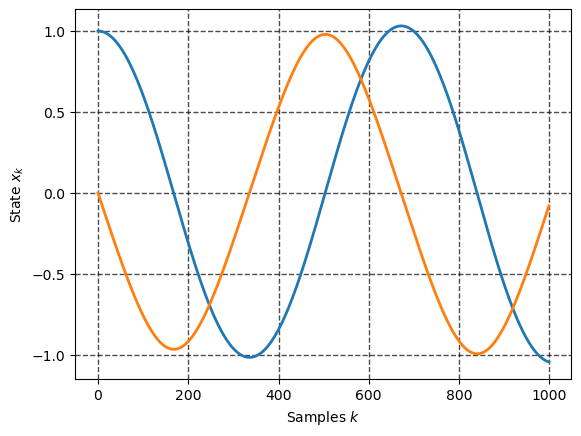

In [3]:
from matplotlib.pyplot import *

plot(x_sol_simp, linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
# xlim([t0, tf])
ylabel(r'State $x_k$')
xlabel(r'Samples $k$')
show()

The Euler method implemented above is highly dependent on the sampling period $T$, there are other suitable methods, the most widely used is the 4-th order Runge-Kutta and advanced variational integrators. However, we will not dig into the integration algorithm, instead for the purpose of simulation we will use `odeint` from the `scipy.integrate`: 

In [4]:
from scipy.integrate import odeint # import integrator routine
scale = 5

X = []
x_prev = x_0
for k in range(N):
    X.append(x_prev)
    t_k = np.linspace(k*T, (k+1)*T, scale)
    u_k = 0
    x_new = odeint(f, x_prev, t_k, args = (u_k,))
    x_prev  = x_new[-1,:] 

x_sol = np.array(X)

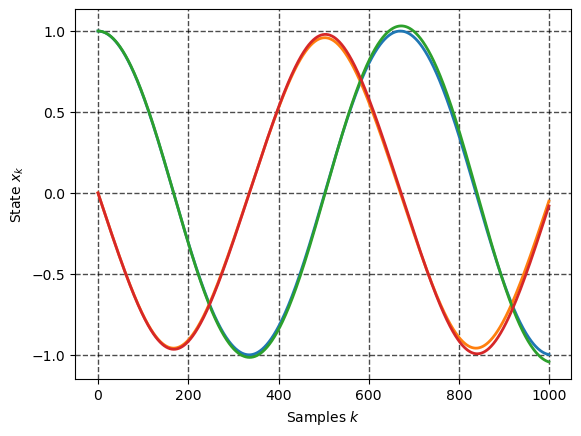

In [5]:
plot(x_sol, linewidth=2.0)
plot(x_sol_simp, linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'State $x_k$')
xlabel(r'Samples $k$')
show()

You will do more on the simulation during **practice session.**